# Section 3 introduces you to Random Variables, Sampling Models, and the Central Limit Theorem.

Section 3 is divided into two parts:

Random Variables and Sampling Models
The Central Limit Theorem.
After completing Section 3, you will:

understand what random variables are, how to generate them, and the correct mathematical notation to use with them.
be able to use sampling models to estimate characteristics of a larger population.
be able to explain the difference between a distribution and a probability distribution.
understand the Central Limit Theorem and the law of large numbers.

In [1]:
using StatsBase
using Plots
using StatsPlots

Being able to quantify the uncertainty introduced by randomness
is one of the most important jobs of a data scientist.


 Many data-generation procedures,
those that produce data that we study, can be modeled
quite well as draws from an urn.
For example, we can model the process of polling likely voters as drawing 0's--
Republicans-- and 1's--
Democrats-- from an urn containing the 0 and 1 code for all likely voters.
We'll see that in more detail later.
In epidemiological studies, we often assume that the subjects in our study
are a random sample from the population of interest.
The data related to a specific outcome can be modeled as a random sample
from an urn containing the values for those outcomes
for the entire population of interest.
Similarly, in experimental research, we often assume that the individual
organisms we are studying-- for example, worms, flies, or mice--
are a random sample from a larger population.
Randomized experiments can also be modeled by draws from urn,
given the way individuals are assigned to groups.
When getting assigned, you draw your group at random.
Sampling models are therefore ubiquitous in data science.
Casino games offer a plethora of examples of real-world situations
in which sampling models are used to answer specific questions.
We will therefore start with such examples.


## roulette wheel.

OK, let's start with this.
Suppose a very small casino hires you to consult on
whether they should set up a roulette wheel.
They want to know if they can make money off it, or if it's too risky
and they might lose.
To keep the example simple, we will assume that 1,000 people will play,
and that the only game you can play is to bet on red or black.
The casino wants to predict how much money they will make or lose.
They want a range of values that are possible,
and in particular, they want to know, what is the chance of losing money?
If this probability is too high, they will
pass on installing roulette wheels, since they
can't take the risk, given that they need to pay their employees
and keep the lights on.
We're going to define a random variable, capital S, that will
represent the casino's total winnings.
Let's start by constructing the urn, the urn we use for our sampling model.
A roulette wheel has 18 red pockets, 18 black pockets, and 2 green ones.
So playing a color in one game of roulette
is equivalent to drawing from this urn.

In [2]:
# construct an Urn corresponding to the colors in the wheel.
# The urn will have 18 red balls, 18 black balls, 2 green balls
# We will use a vector to represent the Urn

red = fill("red", 18) # 18 red balls
black = fill("black", 18) # 18 black balls
green = fill("green", 2) # 2 green balls
urn = vcat(red, black, green) # concatenate the vectors

38-element Vector{String}:
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 ⋮
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "green"
 "green"

In [3]:
"""
    rep(items:: Any, counts:: Any)

Build a sample vector based on a specific pattern. This function repeats each item in the 'items' array 
according to the corresponding count in the 'counts' array.

# Arguments
- `items:: Any`: An array of items that need to be repeated.
- `counts:: Any`: An array of counts specifying how many times each item in 'items' should be repeated.

# Returns
- `Array{Any, 1}`: An array that contains the repeated items according to the specified pattern.

# Examples
```julia-repl
julia> rep(["red", "black", "green"], [18, 18, 2])
```
38-element Array{String,1}:
 "red"
 "red"
 ⋮
 "green"
 "green"
"""
function rep(items:: Any, counts)
    vcat([fill(items[i], counts[i]) for i in 1:length(items)]...)
end


"""
    @rep items counts

A macro to call the `rep` function. This macro simplifies the syntax needed to call the `rep` function. 

# Arguments
- `items`: An array of items that need to be repeated.
- `counts`: An array of counts specifying how many times each item in 'items' should be repeated.

# Returns
- `Array{Any, 1}`: An array that contains the repeated items according to the specified pattern.

# Examples
```julia-repl
julia> @rep ["red", "black", "green"] [18, 18, 2]
38-element Array{String,1}:
 "red"
 "red"
 ⋮
 "green"
 "green"
 ```
"""
macro rep(items, counts)
    quote
        rep($items, $counts)
    end
end




@rep

In [4]:
color = @rep ["red", "black", "green"] [18, 18, 2]

38-element Vector{String}:
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 ⋮
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "green"
 "green"

The 1,000 outcomes from 1,000 people playing
are independent draws from this urn.
If red comes up, the gambler wins, and the casino loses $1,
so we draw a negative 1.
Otherwise, the casino wins $1, and we draw a 1.
We can code 1,000 independent draws using the following code.

In [5]:
# The 1,000 outcomes from 1,000 people playing
# are independent draws from this urn.
# If red comes up, the gambler wins, and the casino loses $1,
# so we draw a negative 1.
# Otherwise, the casino wins $1, and we draw a 1.
# We can code 1,000 independent draws using the following code.

# 1,000 draws from the color

draws = rand(color, 1000);

X = [draw == "red" ? -1 : 1 for draw in draws]

1000-element Vector{Int64}:
  1
 -1
  1
  1
  1
 -1
  1
  1
 -1
 -1
  ⋮
 -1
  1
 -1
  1
  1
  1
 -1
 -1
  1

In [6]:
# Now we can compute the proportions cassino wins and loses

mean(X .== 1) # cassino wins proportions


0.528

In [7]:
mean(X .== -1) # cassino loses proportions, this is around 9/19

0.472

In [8]:
# Because we know the proportions of 1s and -1s, we can generate the draws with one line of
# code, without defining color:

X_draws = StatsBase.sample([-1, 1], Weights([9/19, 10/19]), 1000, replace = true)

1000-element Vector{Int64}:
 -1
  1
 -1
  1
 -1
  1
  1
  1
  1
  1
  ⋮
 -1
  1
  1
  1
  1
 -1
  1
 -1
  1

This expression is calling the sample function from the StatsBase package. Here's what each of the arguments is doing:

[-1, 1]: This is the collection that we're sampling from. It's an array with two elements: -1 and 1.

Weights([9/19, 10/19]): This is specifying the probabilities (or weights) associated with each element in the collection. The Weights function is used to create a Weights object, which the sample function understands. The first element of the array (corresponding to -1) has a weight of 9/19, and the second element (corresponding to 1) has a weight of 10/19. This means that, on average, in a large number of samples, -1 would be chosen 9/19 of the time and 1 would be chosen 10/19 of the time.

1000: This is the number of elements to sample. So the function will return an array of 1000 elements, each of which is either -1 or 1.

replace = true: This is specifying that we're sampling with replacement. That means that after an element is chosen, it's put back into the collection and could be chosen again. In this case, it means that the same number (-1 or 1) could be chosen multiple times in the 1000 samples.

So overall, this expression is generating an array of 1000 elements, where each element is either -1 or 1. The probability of -1 appearing is 9/19, and the probability of 1 appearing is 10/19. The same number could appear multiple times in a row, because we're sampling with replacement.

In [9]:
mean(X_draws .== 1) # cassino wins proportions

0.528

In [10]:
mean(X_draws .== -1) # cassino loses proportions, this is around 9/19

0.472

We call this a **sampling model** since we are modeling the random behavior of roulette
with the sampling of draws from an urn

## Probability Distribution of a Random Variable

In [11]:
S = sum(X_draws)

56

If you run the code above, you see that S changes every time. This is, of course, because
S is a random variable. The probability distribution of a random variable tells us the
probability of the observed value falling at any given interval. So, for example, if we want
to know the probability that we lose money, we are asking the probability that S is in the
interval S < 0.
Note that if we can define a cumulative distribution function F(a) = Pr(S ≤ a), then we will
be able to answer any question related to the probability of events defined by our random
variable S, including the event S < 0. We call this F the random variable’s distribution
function.
We can estimate the distribution function for the random variable S by using a Monte Carlo
simulation to generate many realizations of the random variable. With this code, we run
the experiment of having 1,000 people play roulette, over and over, specifically B = 10, 000
times:

In [12]:
n = 1000
B = 30000







30000

In [13]:
roulette_winnings(n) = sum(StatsBase.sample([-1, 1], Weights([9/19, 10/19]), n, replace = true)) 

roulette_winnings (generic function with 1 method)

In [14]:
S = [roulette_winnings(n) for _ in 1:B]

30000-element Vector{Int64}:
  10
  54
  34
  32
  80
  68
 106
  48
  12
  76
   ⋮
  36
  82
 112
 -10
 -10
  64
  90
  56
  82

In [15]:
roulette_winnings(100)

2

In [16]:

"""
    replicate(B, f, args...)

Replicate the execution of a function `f` with provided arguments `args...` a specified number of times `B`, 
returning an array of the results. This is similar to the `replicate` function in R.

# Arguments
- `B`: The number of times to replicate the function.
- `f`: The function to be replicated.
- `args...`: The arguments to pass to the function `f`.

# Returns
- `Array`: An array containing the results of each function call.

# Examples
```jldoctest
julia> replicate(5, rand, 1:6)
5-element Array{Int64,1}:
 3
 6
 4
 5
 2
 ```
"""
function replicate(B, f, args...)
    return [f(args...) for _ in 1:B]
end



"""
@replicate B f(args...)

A macro to call the replicate function. This macro simplifies the syntax needed to call the replicate function.

Arguments
B: The number of times to replicate the function.
f: The function to be replicated.
args...: The arguments to pass to the function f.
Returns
Array: An array containing the results of each function call.
Examples
jldoctest
Copy code
julia> @replicate 5 rand(1:6)
5-element Array{Int64,1}:
 1
 3
 5
 2
 6
"""
macro replicate(B, f, args...)
    quote
        replicate($B, $f, $args...)
    end
end


@replicate

In [17]:
S = @replicate 30000 roulette_winnings 1000

30000-element Vector{Int64}:
  50
 -10
 114
  68
  94
  42
  54
  60
  54
  88
   ⋮
  28
   2
 104
  62
 108
 106
 -18
  82
  40

Now we can ask the following: in our simulations, how often did we get sums less than or
equal to a?
mean(S <= a)

This will be a very good approximation of F(a) and we can easily answer the casino’s
question: how likely is it that we will lose money? We can see it is quite low:

In [18]:
mean(S .< 0.00)

0.04423333333333333

We can visualize the distribution of S by creating a histogram showing the probability
F(b) − F(a) for several intervals (a, b]:


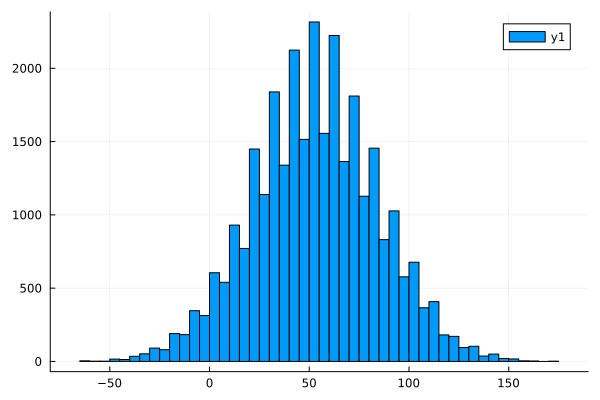

In [19]:
histogram(S)

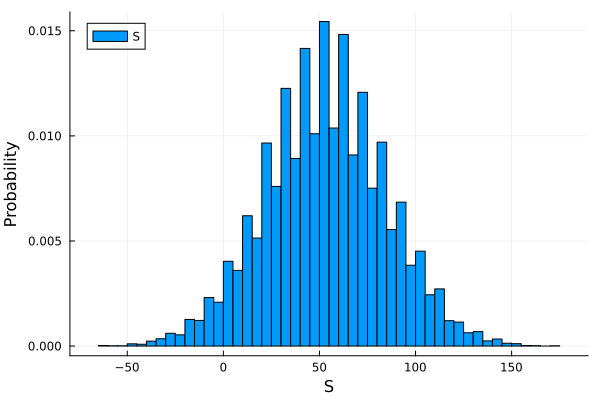

In [20]:
# plot of probability distribution of S
histogram(S, normalize = :pdf, label = "S", legend = :topleft, xlabel = "S", ylabel = "Probability")



We see that the distribution appears to be approximately normal. A qq-plot will confirm
that the normal approximation is close to a perfect approximation for this distribution. If,
in fact, the distribution is normal, then all we need to define the distribution is the average
and the standard deviation. Because we have the original values from which the distribution
is created, we can easily compute these with mean(S) and sd(S). The blue curve you see
added to the histogram above is a normal density with this average and standard deviation.
This average and this standard deviation have special names. They are referred to as the
expected value and standard error of the random variable S. We will say more about these
in the next section.

Let's break it down:

"Statistical theory provides a way to derive the distribution of random variables defined as independent random draws from an urn."

This is saying that if you're drawing random variables independently (i.e., the result of one draw doesn't affect the others), there's a well-defined way to describe the distribution of these variables. This is analogous to drawing balls from an urn with replacement.

"Specifically, in our example above, we can show that (S + n)/2 follows a binomial distribution."

In the context of the roulette simulation you ran earlier, S is the sum of all the roulette results (each of which is -1 or 1), and n is the total number of bets. The expression (S + n)/2 essentially counts the number of wins (results of 1) in the game. This count follows a binomial distribution, which describes the number of successes in a fixed number of independent Bernoulli trials (with the same probability of success).

"We therefore do not need to run Monte Carlo simulations to know the probability distribution of S. We did this for illustrative purposes."



$$ \Pr(S < 0) = \Pr\left(\frac{S + n}{2} < \frac{0 + n}{2}\right) $$

Monte Carlo simulations are a way to estimate probabilities by running many trials and seeing what fraction of them result in a given outcome. However, in this case, because we know the exact distribution that (S + n)/2 follows (a binomial distribution), we don't need to run simulations to know the probabilities -- we can calculate them directly.

"We can use the function dbinom and pbinom to compute the probabilities exactly."

dbinom and pbinom are functions in R for computing probabilities related to the binomial distribution. dbinom gives the probability mass function (the probability of a specific outcome), and pbinom gives the cumulative distribution function (the probability of an outcome less than or equal to a given value).

"For example, to compute Pr(S < 0) we note that: Pr(S < 0) = Pr((S + n)/2 < (0 + n)/2) and we can use the pbinom to compute Pr(S ≤ 0)"

This is showing how to translate a probability involving S into a probability involving (S + n)/2, which follows a binomial distribution. The inequality (S + n)/2 < (0 + n)/2 simplifies to (S + n)/2 < n/2, which is the condition for having less than n/2 wins in the game. The probability of this can be calculated with pbinom.

So, overall, this passage is explaining that because the number of wins in the game follows a binomial distribution, we can calculate probabilities directly rather than needing to estimate them with simulations.

The binomial distribution and the normal distribution are different types of probability distributions, and they aren't interchangeable. However, they are related in a specific way: the normal distribution can be used as an approximation of the binomial distribution under certain conditions.

A binomial distribution is discrete and is used when you have a fixed number of independent trials each with a constant probability of success. The binomial distribution's parameters are n (the number of trials) and p (the probability of success on each trial).

On the other hand, the normal distribution is a continuous distribution and is often used as an approximation for the binomial distribution when n is large and/or when np and n(1-p) are both large.

In these cases, a binomial distribution with parameters n and p can be approximated by a normal distribution with mean μ = np and variance σ² = np(1-p). This is a consequence of the Central Limit Theorem, which states that the sum of a large number of independent and identically distributed random variables will be approximately normally distributed.

So, when you say that the histogram of S follows a "normal" distribution, it suggests that the conditions are being met to approximate the binomial distribution with a normal distribution.

It's important to remember though that the normal approximation is just that - an approximation. The actual underlying distribution is still binomial, and the approximation will not be perfect, especially for values near the tails or when the conditions for the approximation aren't well-met

We can use the equivalent to the pbinom in Julia to compute: $$ \Pr(S \leq 0) $$

In [21]:
using Distributions

n = 1000
BinomialDist = Binomial(n, 10/19)
cdf(BinomialDist, n/2)




0.05109794346909982

Because this is a discrete probability function, to get Pr(S < 0) rather than Pr(S ≤ 0), we
    write

In [22]:
BinomialDist = Binomial(n, 10/19)
cdf(BinomialDist, n/2 - 1)

0.044795906903590074

For the details of the binomial distribution, you can consult any basic probability book or
even Wikipedia3
.
Here we do not cover these details. Instead, we will discuss an incredibly useful approximation provided by mathematical theory that applies generally to sums and averages of draws
from any urn: the Central Limit Theorem (CLT).

## Distribution versus Probability Distribution

Before we continue, let’s make an important distinction and connection between the distribution of a list of numbers and a probability distribution. In the visualization chapter,
we described how any list of numbers x1, . . . , xn has a distribution. The definition is quite
straightforward. We define F(a) as the function that tells us what **proportion** of the list
is less than or equal to a. Because they are useful summaries when the distribution is approximately normal, we define the average and standard deviation. These are defined with
a straightforward operation of the vector containing the list of numbers x:

```R
m <- sum(x)/length(x)
s <- sqrt(sum((x - m)^2) / length(x))
```

A random variable **X** has a distribution function. To define this, we do not need a list of
numbers. It is a theoretical concept. In this case, we define the distribution as the F(a) that
answers the question: what is the **probability** that X is less than or equal to a? There is no
list of numbers.

However, if **X** is defined by drawing from an urn with numbers in it, then there is a list: the
list of numbers inside the urn. In this case, the distribution of that list is the probability
distribution of X and the average and standard deviation of that list are the expected value
and standard error of the random variable.

Another way to think about it that does not involve an urn is to run a Monte Carlo simulation
and generate a very large list of outcomes of X. These outcomes are a list of numbers. The
distribution of this list will be a very good approximation of the probability distribution of
X. The longer the list, the better the approximation. The average and standard deviation
of this list will approximate the expected value and standard error of the random variable.

## Notation for Random Variables

In statistical textbooks, upper case letters are used to denote random variables and we
follow this convention here. Lower case letters are used for observed values. You will see
some notation that includes both. For example, you will see events defined as $$X ≤ x$$ Here
X is a random variable, making it a random event, and x is an arbitrary value and not random. So, for example, X might represent the number on a die roll and x will represent
an actual value we see 1, 2, 3, 4, 5, or 6. So in this case, the probability of X = x is 1/6
regardless of the observed value x. This notation is a bit strange because, when we ask
questions about probability, X is not an observed quantity. Instead, it’s a random quantity
that we will see in the future. We can talk about what we expect it to be, what values are
probable, but not what it is. But once we have data, we do see a realization of X. So data
scientists talk of what could have been after we see what actually happened


## Central Limit Theorem (CLT)

 The Central Limit Theorem--
or the CLT for short tells us that when the number of independent draws--
also called sample size--
is large, the probability distribution of the sum of these draws
is approximately normal.
Because sampling models are used for so many data generation processes,
the CLT is considered one of the most important mathematical insights
in history.
Previously, we discussed that if we know that the distribution
of a list of numbers is approximated by the normal distribution,
all we need to describe the list are the average and the standard deviation.
We also know that the same applies to probability distributions.
If a random variable has a probability distribution that
is approximated with the normal distribution,
then all we need to describe that probability distribution are
the average and the standard deviation.
Referred to as the **expected value and the standard error**.
We have described sampling models for draws.
We will now go over the mathematical theory
that lets us approximate the probability distribution for the sum of draws.
Once we do this, we will be able to help the Casino predict
how much money they will make.
The same approach we use for sum of the draws
will be useful for describing the distribution of averages
and proportions, which we will need to understand, for example, how
polls work.

## Expected Value

$$ E[X] = \mu   $$

The first important concept to learn is the expected value.
In statistics books, it is common to use the letter capital E, like this, E of X
equals mu, to denote that the expected value of the random variable X is mu.
Mu is a Greek letter for M, which is the first letter in the word mean, which
is a synonym with average.
A random variable will vary around an expected value in a way
that if you take the average of many, many draws, the average of the draws
will approximate the expected value.

A useful formula is that the expected value
of the random variables defined by one draw
is the average of the numbers in the urn.
For example, in our urn used to model betting on red on roulette,
we have twenty 1's and 18 negative 1's.
So the expected value is E of X equals 20 plus negative 18 divided by 38.
Which is about $0.05.

In [23]:
Urn = @rep([1, -1], [20, 18])

38-element Vector{Int64}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [24]:
#Expected value of the Urn
Urn |> mean

0.05263157894736842

It is a bit counterintuitive to say that X
varies around 0.05 when the only values it takes is 1 and minus 1.
An intuitive way to think about the expected value
is that if we play the game over and over,
the Casino wins, on average, $0.05 per game.
Our Monte Carlo Simulation confirms this.
Here we run a million games and we see that the mean of X, which is
a bunch of 0s and 1s, is about $0.05.
In general, if the urn has just two possible outcomes-- say, a and b,
with proportions p and 1 minus p respectively,
the average is a times p plus b times 1 minus p.
To see this, notice that if there are nb's in the urn,
then we have npa's and n times 1 minus is pb's.
And because the average is the sum, we have n times a times p plus n times
b times 1 minus p divided by the total, which is n.
And we get the formula that we just saw.
Now, the reason we define the expected value
is because this mathematical definition turns out
to be useful for approximating the probability distribution of sums,
which in turn, is useful to describe the distribution of averages
and proportions.
The first useful fact is that the expected value of the sum of draws
is the number of draws times the average of the numbers in the urn.
So if 1,000 people play roulette, the Casino expects to win,
on average, 1,000 times $0.05, which is $50.

## Standard Error

How different can one observation be from the expected value ?
The Casino really wants to know this.
What is the range of possibilities?
If negative numbers are too likely, we may not install the roulette wheels.
Statistical theory, once again, answers this question.
The standard error, or SE for short, gives us
an idea of the size of the variation around the expected value.
In statistics books, it is common to use SE of X
to know the standard error of the random variable
X If our draws are independent--
That's an important assumption-- then the standard error of the sum
is given by the equation, the square root of the number of draws,
times the standard deviation of the numbers in the urn.
Using the definition of standard deviation,
we can derive with a bit of math, that if an urn contains two values--
a and b, with proportions p and 1 minus p, respectively--
the standard deviation is the absolute value of b minus a times
the square root of p times 1 minus p.

$$ SE[X] = \sqrt{draws} * \sigma $$

In [25]:
n = 1000;
μ = n * (20-18)/38
se = sqrt(n) * 2 * sqrt(90)/19



31.57894736842105

```R
# R code
mu <- n * (20-18)/38
se <- sqrt(n) * 2 * sqrt(90) / 19
pnorm(0, mu, se)
```

In [26]:
using Distributions

In [27]:
NormalDist = Normal(μ, se)

Normal{Float64}(μ=52.63157894736842, σ=31.57894736842105)

In [28]:
result = cdf(NormalDist, 0)

0.0477903522728147

So when 1,000 people bet on red, the Casino
is expected to win $50 with a standard error of $32.
So it seems like a safe bet.
But we still really can't answer the question--
How likely is the Casino to lose money?
Here The Central Limit Theorem will help.
The central limit theorem tells us that the distribution of the sum of S
is approximated by a normal distribution.
Using the formula, we know that the expected value and standard errors
are $52 and $32, respectively.
Note that the theoretical values match those obtained with the Monte Carlo
simulation we ran earlier.
Using the Central Limit Theorem, we can skip the Monte Carlo simulation
and instead, compute the probability of the Casino losing
money using the approximation.
We write the simple code using the pnorm function and we get the answer.
It's about 5%.
Which, is in very good agreement-- with the Monte Carlo simulation we ran.

## Averages and Proportions

There are some useful mathematical results, some of which
we used previously, that are often used when working with data.
We're going to list them here. 

### 1st Property
The first, is that the expected value of a sum of random variables
is the sum of the expected values of the individual random variables.
We can write it like this, using mathematical notation.
If the x are drawn from the same urn, then they all
have the same expected value.

We call it mu here.
And therefore, the expected value of the sum
is n times mu, which is another way of writing the result of the sum of draws.

### 2nd Property
A second property is that the expected value
of random variables times a non-random constant
is the expected value times that non-random constant.
This is easier to explain with mathematical symbols, which
we show here.

To see why this is intuitive, think of a change of units.
If we change the units of the random variable, say from dollars to cents,
the expectation should change in the same way.
A consequence of these two facts that we described
is that the expected value of the average of draws from the same urn
is the expected value of the urn, call it mu again.
Here is that result written out in mathematical formula.
So the expected value of the average is mu,
the average of the values in the urn.

### 3rd Property
A third property is that the square of the standard error
of the sum of independent random variables
is the sum of the square of the standard error of each random variable.
This one is easier to understand in its math form.
The standard error of the sum of x is the square root
of the sum of the standard error squared, as you can see here.
Note that the square of the standard error
is referred to as a variance in statistical textbooks.

### 4th Property
A fourth property is that the standard error
of random variables times a non-random constant
is the standard error times a non-random constant.
As with the expectation, we have the following formula.
To see why this is intuitive, again, think of change of units.
A consequence of these previous two properties
is that the standard error of the average of independent draws
from the same urn is the standard deviation
of the urn-- let's call it sigma, this is the Greek letter for s.
--divided by the square root of n.
Here it is in the mathematical form.
And here we are using the properties we just described to derive that result.

### 5th Property
The last property that we're going to talk about
is that if x is a normally distributed random variable, then
if a and b are non-random constants, then a times X plus b is also
a normally distributed random variable.
Note that we are doing is changing the units of the random variable
by multiplying by a and then shifting the center by adding b.

Key points
Random variable times a constant
The expected value of a random variable multiplied by a constant is that constant times its original expected value:

The standard error of a random variable multiplied by a constant is that constant times its original standard error:

Average of multiple draws of a random variable
The expected value of the average of multiple draws from an urn is the expected value of the urn ().

The standard deviation of the average of multiple draws from an urn is the standard deviation of the urn divided by the square root of the number of draws ().

The sum of multiple draws of a random variable
The expected value of the sum of  draws of a random variable is  times its original expected value:

The standard error of the sum of  draws of random variable is  times its original standard error:


The sum of multiple different random variables
The expected value of the sum of different random variables is the sum of the individual expected values for each random variable:

The standard error of the sum of different random variables is the square root of the sum of squares of the individual standard errors:

Transformation of random variables
If  is a normally distributed random variable and  and  are non-random constants, then  is also a normally distributed random variable.

## Key Points

- Random variable times a constant

> The expected value of a random variable multiplied by a constant is that constant times its original expected value:

<math xmlns="http://www.w3.org/1998/Math/MathML" data-semantic-type="punctuated" data-semantic-role="text" data-semantic-id="15" data-semantic-children="0,13" data-semantic-collapsed="(15 (c 14) 0 13)" data-semantic-complexity="5">
  <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1">
    <mtext data-semantic-type="text" data-semantic-role="latinletter" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="15" data-semantic-complexity="1">E</mtext>
  </mstyle>
  <maction id="MJX-Collapse-3" actiontype="toggle" selection="2" data-semantic-complexity="2">
    <mtext data-semantic-complexity="2">&#x25C2;=&#x25B8;</mtext>
    <mrow data-semantic-type="relseq" data-semantic-role="equality" data-semantic-id="13" data-semantic-children="10,12" data-semantic-content="5" data-semantic-parent="15" data-semantic-complexity="21">
      <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="10" data-semantic-children="9" data-semantic-content="1,4" data-semantic-parent="13" data-semantic-complexity="11">
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="10" data-semantic-operator="fenced" data-semantic-complexity="1">[</mo>
        <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="9" data-semantic-children="2,3" data-semantic-content="8" data-semantic-parent="10" data-semantic-complexity="6">
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="9" data-semantic-complexity="1">a</mi>
          <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="8" data-semantic-parent="9" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="3" data-semantic-parent="9" data-semantic-complexity="1">X</mi>
        </mrow>
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="4" data-semantic-parent="10" data-semantic-operator="fenced" data-semantic-complexity="1">]</mo>
      </mrow>
      <mo data-semantic-type="relation" data-semantic-role="equality" data-semantic-id="5" data-semantic-parent="13" data-semantic-operator="relseq,=" data-semantic-complexity="1">=</mo>
      <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="12" data-semantic-children="6,7" data-semantic-content="11" data-semantic-parent="13" data-semantic-complexity="6">
        <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="12" data-semantic-complexity="1">a</mi>
        <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="11" data-semantic-parent="12" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
        <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="7" data-semantic-parent="12" data-semantic-complexity="1">&#x3BC;</mi>
      </mrow>
    </mrow>
  </maction>
</math>

- The standard error of a random variable multiplied by a constant is that constant times its original standard error:

<math xmlns="http://www.w3.org/1998/Math/MathML" data-semantic-type="punctuated" data-semantic-role="text" data-semantic-id="15" data-semantic-children="0,13" data-semantic-collapsed="(15 (c 14) 0 13)" data-semantic-complexity="5.5">
  <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
    <mtext data-semantic-type="text" data-semantic-role="unknown" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="15" data-semantic-complexity="1.5">SE</mtext>
  </mstyle>
  <maction id="MJX-Collapse-4" actiontype="toggle" selection="2" data-semantic-complexity="2">
    <mtext data-semantic-complexity="2">&#x25C2;=&#x25B8;</mtext>
    <mrow data-semantic-type="relseq" data-semantic-role="equality" data-semantic-id="13" data-semantic-children="10,12" data-semantic-content="5" data-semantic-parent="15" data-semantic-complexity="21">
      <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="10" data-semantic-children="9" data-semantic-content="1,4" data-semantic-parent="13" data-semantic-complexity="11">
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="10" data-semantic-operator="fenced" data-semantic-complexity="1">[</mo>
        <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="9" data-semantic-children="2,3" data-semantic-content="8" data-semantic-parent="10" data-semantic-complexity="6">
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="9" data-semantic-complexity="1">a</mi>
          <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="8" data-semantic-parent="9" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="3" data-semantic-parent="9" data-semantic-complexity="1">X</mi>
        </mrow>
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="4" data-semantic-parent="10" data-semantic-operator="fenced" data-semantic-complexity="1">]</mo>
      </mrow>
      <mo data-semantic-type="relation" data-semantic-role="equality" data-semantic-id="5" data-semantic-parent="13" data-semantic-operator="relseq,=" data-semantic-complexity="1">=</mo>
      <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="12" data-semantic-children="6,7" data-semantic-content="11" data-semantic-parent="13" data-semantic-complexity="6">
        <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="12" data-semantic-complexity="1">a</mi>
        <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="11" data-semantic-parent="12" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
        <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="7" data-semantic-parent="12" data-semantic-complexity="1">&#x3C3;</mi>
      </mrow>
    </mrow>
  </maction>
</math>

- Average of multiple draws of a random variable
The expected value of the average of multiple draws from an urn is the expected value of the urn ().

The standard deviation of the average of multiple draws from an urn is the standard deviation of the urn divided by the square root of the number of draws (<math xmlns="http://www.w3.org/1998/Math/MathML" data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="4" data-semantic-children="0,3" data-semantic-content="1" data-semantic-complexity="8">
  <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="0" data-semantic-parent="4" data-semantic-complexity="1">&#x3C3;</mi>
  <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
    <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="1" data-semantic-parent="4" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
  </mrow>
  <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="3" data-semantic-children="2" data-semantic-parent="4" data-semantic-complexity="3">
    <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="3" data-semantic-complexity="1">n</mi>
  </msqrt>
</math>).

- The sum of multiple draws of a random variable
The expected value of the sum of  draws of a random variable is n times its original expected value:

<math xmlns="http://www.w3.org/1998/Math/MathML" data-semantic-type="punctuated" data-semantic-role="text" data-semantic-id="15" data-semantic-children="0,13" data-semantic-collapsed="(15 (c 14) 0 13)" data-semantic-complexity="5">
  <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1">
    <mtext data-semantic-type="text" data-semantic-role="latinletter" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="15" data-semantic-complexity="1">E</mtext>
  </mstyle>
  <maction id="MJX-Collapse-5" actiontype="toggle" selection="2" data-semantic-complexity="2">
    <mtext data-semantic-complexity="2">&#x25C2;=&#x25B8;</mtext>
    <mrow data-semantic-type="relseq" data-semantic-role="equality" data-semantic-id="13" data-semantic-children="10,12" data-semantic-content="5" data-semantic-parent="15" data-semantic-complexity="21">
      <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="10" data-semantic-children="9" data-semantic-content="1,4" data-semantic-parent="13" data-semantic-complexity="11">
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="10" data-semantic-operator="fenced" data-semantic-complexity="1">[</mo>
        <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="9" data-semantic-children="2,3" data-semantic-content="8" data-semantic-parent="10" data-semantic-complexity="6">
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="9" data-semantic-complexity="1">n</mi>
          <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="8" data-semantic-parent="9" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="3" data-semantic-parent="9" data-semantic-complexity="1">X</mi>
        </mrow>
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="4" data-semantic-parent="10" data-semantic-operator="fenced" data-semantic-complexity="1">]</mo>
      </mrow>
      <mo data-semantic-type="relation" data-semantic-role="equality" data-semantic-id="5" data-semantic-parent="13" data-semantic-operator="relseq,=" data-semantic-complexity="1">=</mo>
      <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="12" data-semantic-children="6,7" data-semantic-content="11" data-semantic-parent="13" data-semantic-complexity="6">
        <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="12" data-semantic-complexity="1">n</mi>
        <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="11" data-semantic-parent="12" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
        <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="7" data-semantic-parent="12" data-semantic-complexity="1">&#x3BC;</mi>
      </mrow>
    </mrow>
  </maction>
</math>

The standard error of the sum of n draws of random variable is sqrt(n) times its original standard error:

<math xmlns="http://www.w3.org/1998/Math/MathML" data-semantic-type="punctuated" data-semantic-role="text" data-semantic-id="16" data-semantic-children="0,14" data-semantic-collapsed="(16 (c 15) 0 14)" data-semantic-complexity="5.5">
  <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
    <mtext data-semantic-type="text" data-semantic-role="unknown" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="16" data-semantic-complexity="1.5">SE</mtext>
  </mstyle>
  <maction id="MJX-Collapse-6" actiontype="toggle" selection="2" data-semantic-complexity="2">
    <mtext data-semantic-complexity="2">&#x25C2;=&#x25B8;</mtext>
    <mrow data-semantic-type="relseq" data-semantic-role="equality" data-semantic-id="14" data-semantic-children="11,13" data-semantic-content="5" data-semantic-parent="16" data-semantic-complexity="23">
      <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="11" data-semantic-children="10" data-semantic-content="1,4" data-semantic-parent="14" data-semantic-complexity="11">
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="11" data-semantic-operator="fenced" data-semantic-complexity="1">[</mo>
        <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="10" data-semantic-children="2,3" data-semantic-content="9" data-semantic-parent="11" data-semantic-complexity="6">
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="10" data-semantic-complexity="1">n</mi>
          <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="9" data-semantic-parent="10" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="3" data-semantic-parent="10" data-semantic-complexity="1">X</mi>
        </mrow>
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="4" data-semantic-parent="11" data-semantic-operator="fenced" data-semantic-complexity="1">]</mo>
      </mrow>
      <mo data-semantic-type="relation" data-semantic-role="equality" data-semantic-id="5" data-semantic-parent="14" data-semantic-operator="relseq,=" data-semantic-complexity="1">=</mo>
      <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="13" data-semantic-children="7,8" data-semantic-content="12" data-semantic-parent="14" data-semantic-complexity="8">
        <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="7" data-semantic-children="6" data-semantic-parent="13" data-semantic-complexity="3">
          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="7" data-semantic-complexity="1">n</mi>
        </msqrt>
        <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="12" data-semantic-parent="13" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
        <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="8" data-semantic-parent="13" data-semantic-complexity="1">&#x3C3;</mi>
      </mrow>
    </mrow>
  </maction>
</math>

- The sum of multiple different random variables The expected value of the sum of different random variables is the sum of the individual expected values for each random variable:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <maction id="MJX-Collapse-10" actiontype="toggle" selection="2" data-semantic-complexity="3">
    <mtext data-semantic-complexity="3">&#x25C2;...&#x25B8;</mtext>
    <mrow data-semantic-complexity="16" data-semantic-collapsed="(35 (c 34) 0 33)" data-semantic-children="0,33" data-semantic-id="35" data-semantic-role="text" data-semantic-type="punctuated">
      <mrow>
        <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1">
          <mtext data-semantic-type="text" data-semantic-role="latinletter" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="35" data-semantic-complexity="1">E</mtext>
        </mstyle>
        <mrow data-semantic-type="relseq" data-semantic-role="equality" data-semantic-id="33" data-semantic-children="31,32" data-semantic-content="16" data-semantic-parent="35" data-semantic-complexity="13">
          <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="31" data-semantic-children="30" data-semantic-content="1,15" data-semantic-parent="33" data-semantic-complexity="7">
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="31" data-semantic-operator="fenced" data-semantic-complexity="1">[</mo>
            <maction id="MJX-Collapse-8" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;+&#x25B8;</mtext>
              <mrow data-semantic-type="infixop" data-semantic-role="addition" data-semantic-id="30" data-semantic-children="4,8,10,14" data-semantic-content="5,9,11" data-semantic-parent="31" data-semantic-complexity="30.799999999999997">
                <msub data-semantic-type="subscript" data-semantic-role="latinletter" data-semantic-id="4" data-semantic-children="2,3" data-semantic-parent="30" data-semantic-complexity="6.6">
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="4" data-semantic-complexity="1">X</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="3" data-semantic-parent="4" data-semantic-complexity="1">1</mn>
                </msub>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="5" data-semantic-parent="30" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <msub data-semantic-type="subscript" data-semantic-role="latinletter" data-semantic-id="8" data-semantic-children="6,7" data-semantic-parent="30" data-semantic-complexity="6.6">
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="8" data-semantic-complexity="1">X</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="7" data-semantic-parent="8" data-semantic-complexity="1">2</mn>
                </msub>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="9" data-semantic-parent="30" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <mo data-semantic-type="punctuation" data-semantic-role="ellipsis" data-semantic-id="10" data-semantic-parent="30" data-semantic-complexity="1">&#x22EF;</mo>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="11" data-semantic-parent="30" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <msub data-semantic-type="subscript" data-semantic-role="latinletter" data-semantic-id="14" data-semantic-children="12,13" data-semantic-parent="30" data-semantic-complexity="6.6">
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="12" data-semantic-parent="14" data-semantic-complexity="1">X</mi>
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="13" data-semantic-parent="14" data-semantic-complexity="1">n</mi>
                </msub>
              </mrow>
            </maction>
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="15" data-semantic-parent="31" data-semantic-operator="fenced" data-semantic-complexity="1">]</mo>
          </mrow>
          <mo data-semantic-type="relation" data-semantic-role="equality" data-semantic-id="16" data-semantic-parent="33" data-semantic-operator="relseq,=" data-semantic-complexity="1">=</mo>
          <maction id="MJX-Collapse-9" actiontype="toggle" selection="2" data-semantic-complexity="2">
            <mtext data-semantic-complexity="2">&#x25C2;+&#x25B8;</mtext>
            <mrow data-semantic-type="infixop" data-semantic-role="addition" data-semantic-id="32" data-semantic-children="19,23,25,29" data-semantic-content="20,24,26" data-semantic-parent="33" data-semantic-complexity="30.799999999999997">
              <msub data-semantic-type="subscript" data-semantic-role="greekletter" data-semantic-id="19" data-semantic-children="17,18" data-semantic-parent="32" data-semantic-complexity="6.6">
                <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="17" data-semantic-parent="19" data-semantic-complexity="1">&#x3BC;</mi>
                <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="18" data-semantic-parent="19" data-semantic-complexity="1">1</mn>
              </msub>
              <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="20" data-semantic-parent="32" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
              <msub data-semantic-type="subscript" data-semantic-role="greekletter" data-semantic-id="23" data-semantic-children="21,22" data-semantic-parent="32" data-semantic-complexity="6.6">
                <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="21" data-semantic-parent="23" data-semantic-complexity="1">&#x3BC;</mi>
                <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="22" data-semantic-parent="23" data-semantic-complexity="1">2</mn>
              </msub>
              <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="24" data-semantic-parent="32" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
              <mo data-semantic-type="punctuation" data-semantic-role="ellipsis" data-semantic-id="25" data-semantic-parent="32" data-semantic-complexity="1">&#x22EF;</mo>
              <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="26" data-semantic-parent="32" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
              <msub data-semantic-type="subscript" data-semantic-role="greekletter" data-semantic-id="29" data-semantic-children="27,28" data-semantic-parent="32" data-semantic-complexity="6.6">
                <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="27" data-semantic-parent="29" data-semantic-complexity="1">&#x3BC;</mi>
                <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="28" data-semantic-parent="29" data-semantic-complexity="1">n</mi>
              </msub>
            </mrow>
          </maction>
        </mrow>
      </mrow>
    </mrow>
  </maction>
</math>

The standard error of the sum of different random variables is the square root of the sum of squares of the individual standard errors:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <maction id="MJX-Collapse-15" actiontype="toggle" selection="2" data-semantic-complexity="3">
    <mtext data-semantic-complexity="3">&#x25C2;...&#x25B8;</mtext>
    <mrow data-semantic-complexity="18.5" data-semantic-collapsed="(42 (c 41) 0 40)" data-semantic-children="0,40" data-semantic-id="42" data-semantic-role="text" data-semantic-type="punctuated">
      <mrow>
        <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
          <mtext data-semantic-type="text" data-semantic-role="unknown" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="42" data-semantic-complexity="1.5">SE</mtext>
        </mstyle>
        <mrow data-semantic-type="relseq" data-semantic-role="equality" data-semantic-id="40" data-semantic-children="39,37" data-semantic-content="16" data-semantic-parent="42" data-semantic-complexity="15">
          <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="39" data-semantic-children="38" data-semantic-content="1,15" data-semantic-parent="40" data-semantic-complexity="7">
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="39" data-semantic-operator="fenced" data-semantic-complexity="1">[</mo>
            <maction id="MJX-Collapse-12" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;+&#x25B8;</mtext>
              <mrow data-semantic-type="infixop" data-semantic-role="addition" data-semantic-id="38" data-semantic-children="4,8,10,14" data-semantic-content="5,9,11" data-semantic-parent="39" data-semantic-complexity="30.799999999999997">
                <msub data-semantic-type="subscript" data-semantic-role="latinletter" data-semantic-id="4" data-semantic-children="2,3" data-semantic-parent="38" data-semantic-complexity="6.6">
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="4" data-semantic-complexity="1">X</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="3" data-semantic-parent="4" data-semantic-complexity="1">1</mn>
                </msub>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="5" data-semantic-parent="38" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <msub data-semantic-type="subscript" data-semantic-role="latinletter" data-semantic-id="8" data-semantic-children="6,7" data-semantic-parent="38" data-semantic-complexity="6.6">
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="8" data-semantic-complexity="1">X</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="7" data-semantic-parent="8" data-semantic-complexity="1">2</mn>
                </msub>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="9" data-semantic-parent="38" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <mo data-semantic-type="punctuation" data-semantic-role="ellipsis" data-semantic-id="10" data-semantic-parent="38" data-semantic-complexity="1">&#x22EF;</mo>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="11" data-semantic-parent="38" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <msub data-semantic-type="subscript" data-semantic-role="latinletter" data-semantic-id="14" data-semantic-children="12,13" data-semantic-parent="38" data-semantic-complexity="6.6">
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="12" data-semantic-parent="14" data-semantic-complexity="1">X</mi>
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="13" data-semantic-parent="14" data-semantic-complexity="1">n</mi>
                </msub>
              </mrow>
            </maction>
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="15" data-semantic-parent="39" data-semantic-operator="fenced" data-semantic-complexity="1">]</mo>
          </mrow>
          <mo data-semantic-type="relation" data-semantic-role="equality" data-semantic-id="16" data-semantic-parent="40" data-semantic-operator="relseq,=" data-semantic-complexity="1">=</mo>
          <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="37" data-semantic-children="36" data-semantic-parent="40" data-semantic-complexity="4">
            <maction id="MJX-Collapse-14" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;+&#x25B8;</mtext>
              <mrow data-semantic-type="infixop" data-semantic-role="addition" data-semantic-id="36" data-semantic-children="21,27,29,35" data-semantic-content="22,28,30" data-semantic-parent="37" data-semantic-complexity="33.8">
                <msubsup data-semantic-type="subsup" data-semantic-role="greekletter" data-semantic-id="21" data-semantic-children="17,18,19" data-semantic-parent="36" data-semantic-collapsed="(21 (20 17 18) 19)" data-semantic-complexity="7.6">
                  <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="17" data-semantic-parent="21" data-semantic-complexity="1">&#x3C3;</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="18" data-semantic-parent="21" data-semantic-complexity="1">1</mn>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="19" data-semantic-parent="21" data-semantic-complexity="1">2</mn>
                </msubsup>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="22" data-semantic-parent="36" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <msubsup data-semantic-type="subsup" data-semantic-role="greekletter" data-semantic-id="27" data-semantic-children="23,24,25" data-semantic-parent="36" data-semantic-collapsed="(27 (26 23 24) 25)" data-semantic-complexity="7.6">
                  <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="23" data-semantic-parent="27" data-semantic-complexity="1">&#x3C3;</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="24" data-semantic-parent="27" data-semantic-complexity="1">2</mn>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="25" data-semantic-parent="27" data-semantic-complexity="1">2</mn>
                </msubsup>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="28" data-semantic-parent="36" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <mo data-semantic-type="punctuation" data-semantic-role="ellipsis" data-semantic-id="29" data-semantic-parent="36" data-semantic-complexity="1">&#x22EF;</mo>
                <mo data-semantic-type="operator" data-semantic-role="addition" data-semantic-id="30" data-semantic-parent="36" data-semantic-operator="infixop,+" data-semantic-complexity="1">+</mo>
                <msubsup data-semantic-type="subsup" data-semantic-role="greekletter" data-semantic-id="35" data-semantic-children="31,32,33" data-semantic-parent="36" data-semantic-collapsed="(35 (34 31 32) 33)" data-semantic-complexity="7.6">
                  <mi mathvariant="italic" data-semantic-type="identifier" data-semantic-role="greekletter" data-semantic-font="italic" data-semantic-id="31" data-semantic-parent="35" data-semantic-complexity="1">&#x3C3;</mi>
                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="32" data-semantic-parent="35" data-semantic-complexity="1">n</mi>
                  <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="33" data-semantic-parent="35" data-semantic-complexity="1">2</mn>
                </msubsup>
              </mrow>
            </maction>
          </msqrt>
        </mrow>
      </mrow>
    </mrow>
  </maction>
</math>

Transformation of random variables

If  $$ X $$ is a normally distributed random variable and `a`  and `b` are non-random constants, then $$aX+b$$
 is also a normally distributed random variable.

## Law of large numbers

An important implication of the properties
we described in the previous video is that the standard error
of the average of draws becomes smaller and smaller as the number of draws n
grows larger.

When n is very large, then the standard error is practically 0,
and the average of the draws converges to the average of the urn.
This is known in statistical textbooks as the law of large numbers,
or the law of averages.

Note that the law of averages is sometimes misinterpreted.
For example, if you toss a coin five times and you see heads each time,
you might hear someone argue that the next toss is probably
a tail because of the law of averages.

On average, we should 50% heads and 50% tails,
so we need more tails to make up.

A similar argument would be to say that red is due on roulette
after seeing black come up five times in a row.
These events are independent.

So the chance of a coin landing heads is 50%, regardless of the previous five.
Similarly for the roulette outcome.

The law of averages applies only when the number of draws
is very, very large, not in small samples.

After a million tosses, you will definitely see about 50% heads,
regardless of what the first five were.

Another somewhat funny misuse of the law of averages
is in sports, where you sometimes hear TV announcers predict
a player is about to succeed because they have failed a few times in a row,
and they need successes to make up and match their average.

## How Large is Large Enough in Central Limit Theorem

AL IRIZARRY: The central limit theorem works when the number of draws
is large.
But large is a relative term.

How big is large?
15, 100, a million?

In many circumstances, as few as 30 draws is enough to make the CLT useful.
In specific instances, as few as 10 is enough.
However, these should not be considered general rules.
Note for example, that when the probability of success is very small,
we need larger sample sizes.
Consider for example, the lottery.

In the lottery, the chance of winning are less than 1 in a million.
Thousands of people play, so the number of draws is very large.
So the central limit should work.

Yet, the number of winners, the sum of the draws,
range between 0, and in very extreme cases, four.
This sum is certainly not well approximated
by the normal distribution.

So the central limit theorem doesn't apply, even
with a very large sample size.

This is generally true when the probability of success is very low.
In these cases, the Poisson distribution is more appropriate.

We do not cover the theory here, but you can
learn about the Poisson distribution in any probability textbook and even
Wikipedia.

## The Big Short : Interest Rates Explained

FAEL IRIZARRY: In a way, the sampling models we've been talking about
are also used by banks to decide interest rates.
Let's see how this could be.
Suppose you run a small bank that has a history of identifying
potential homeowners that can be trusted to make payments.
In fact, historically in a given year only 2%
of your customers default, meaning that they don't pay back the money
you lent them.

However, note that if you simply loan money to everybody without interest,
you'll end up losing money due to this 2%.
Although you know 2% of your clients will probably default,
you don't know which ones.

However, by charging everybody just a bit extra
you can make up for the losses incurred due to the 2%,
and also pay the employees at work to make these loans happen.
You can also make a profit, but if you set the interest rate too high
your clients will go to another bank.
We use all these facts and some probability theory
to decide what interest rates we should charge.

Suppose your bank will give out 1,000 loans for 180,000 this year.
Also suppose that your bank loses, after adding up
all the costs, $200,000 per foreclosure.
For simplicity, we assume that that includes all operational costs.
A sampling model for this scenario is coded like this.
We either default and lose money, or not default and not lose money.
If we run the simulation we see that we lose $2.8 millions.
Note that the total loss defined by the final sum is a random variable.
Every time you run the code you get a different answer.
This is because it's a probability of defaulting.
It's not going to happen for sure.

We can easily construct a Monte Carlo simulation
to get an idea of the distribution of this random variable.
Here's the distribution.
You can see that we're going to lose money because of these people
that default. And here's the distribution of how much money we're
going to lose in millions.

We don't really need a Monte Carlo simulation though.
Using what we've learned, the CLT tells us
that because our losses are a sum of independent draws,
its distribution is approximately normal with expected
value and standard deviation given by the following formula.
We can now set an interest rate to guarantee that on average, we
break even.

Basically, we need to add a quantity x to each loan, which in this case
are represented by draws, so that the expected value is zero.
That means breaking even.
If we define l to be the loss per foreclosure,
we need to set x so that the following formula holds,
which implies that x can be calculated using this R code, which gives us
about 4,081.

This is an interest rate of about 2%.
We still have a problem though.

Although this interest rate guarantees that on average we break even,
there's a 50% chance that we will lose money.

If our bank loses money, we have to close it down.

So we need to pick an interest rate that makes it unlikely for this to happen.
At the same time, if the interest rate is too high
our clients will go to another bank.

So we must be willing to take some risks.
So, let's they say that we want our chances
of losing money to be one in 100.
What does x have to be now?

This one is a bit harder.

We want the sum-- let's call it capital S-- to have the probability
of S less than zero to be 0.01.

We know that S is approximately normal.

The expected value of S is given by this formula,
with n the number of draws, which in this case
represents the number of loans.

The standard error is given by this formula.
Because x is positive and l is negative, we
know that the absolute value of x minus l is x minus l.

Note that these are just the formulas we showed earlier,
but using more compact symbols.

Now we're going to use a mathematical trick that
is very common in statistics.

We're going to add and subtract the same quantities to both sides of the event S
less than zero so that the probability does not change,
and we end up with a standard normal random variable
on the left, which will then permit us to write down an equation with only
x as an unknown.

Here it goes.

We want the probability of S being less than zero to be 0.01.
So what we're going to do now is we're going
to subtract the expected value of S and divide by the standard error of S
on both sides of the equation.

All we did was add and divide by the same quantity on both sides.
We did this because now the term on the left
is a standard normal random variable, which we will rename as capital Z.
Now, we will fill in the blanks with the actual formula for expected value
and standard error.

The formula now looks like this.
We have a Z on the left.

That's good, that's going to make things easier later.
The right looks complicated, but remember
that l, p, and n are all known amounts, so eventually we'll
turn them into numbers.

Now, because the term on the left side is a normal random variable
with expected value of zero and standard error one,
it means that the quantity on the right must
be equal to qnorm of 0.01, which is negative 2.32.

Then the equation above will hold true.
Remember that if we set little z to be qnorm of 0.01,
this will give you a value of little z for which the following formula is
true.

The probability of big Z, less than or equal to little z, equal 0.01.
So this means that the right side of the complicated equation
must be equal to qnorm 0.01.
So we have this formula.

The trick works, because we end up with an expression containing
x that we know has to be equal to an quantity depending on things we know.
Solving for x is now simply, algebra.

If we do it, we get that the x has to be about 6,249,
which is an interest rate of about 3%, which is still pretty good.
Note also that by choosing this interest rate,
we now have an expected profit per loan of about $2,124,
which is a total expected profit of about $2 million.

We can run a Monte Carlo simulation and check our theoretical approximation.
We do that, and we indeed get that value again.
And again, the probability of profit being less than zero
according to the Monte Carlo simulation is about 1%.

## Modeling

Suppose your bank will give out 1,000 loans for $180,000 this year. Also, after adding up all costs, suppose your bank loses $200,000 per foreclosure. For simplicity, we assume this includes all operational costs. A sampling model for this scenario can be coded like this:

```R
n <- 1000
loss_per_foreclosure <- -200000
p <- 0.02 
defaults <- sample( c(0,1), n, prob=c(1-p, p), replace = TRUE)
sum(defaults * loss_per_foreclosure)
#> [1] -4400000

```

In [30]:
n = 1000
loss_per_foreclosure = - 200000

p = 0.02 # probability of customers defaulting



0.02

In [31]:
# customers can default or not default

defaults(n) = sum(StatsBase.sample([0, 1], Weights([1-p, p]), n, replace = true) .* loss_per_foreclosure)

defaults (generic function with 1 method)

Note that the total loss defined by the final sum is a random variable. Every time you run the above code, you get a different answer. We can easily construct a Monte Carlo simulation to get an idea of the distribution of this random variable.

```R
B <- 10000
losses <- replicate(B, {
    defaults <- sample( c(0,1), n, prob=c(1-p, p), replace = TRUE) 
  sum(defaults * loss_per_foreclosure)
})

```

In [32]:

losses = @replicate 10000 defaults 1000

10000-element Vector{Int64}:
 -4600000
 -2600000
 -6000000
 -5000000
 -3400000
 -4800000
 -3800000
 -4600000
 -4200000
 -4800000
        ⋮
 -3800000
 -5200000
 -3600000
 -4200000
 -4400000
 -3600000
 -5000000
 -4600000
 -3200000

In [33]:
mean(losses)

-3.99836e6

We don’t really need a Monte Carlo simulation though. Using what we have learned, the CLT tells us that because our losses are a sum of independent draws, its distribution is approximately normal with expected value and standard errors given by:

```R
n*(p*loss_per_foreclosure + (1-p)*0)
#> [1] -4e+06
sqrt(n)*abs(loss_per_foreclosure)*sqrt(p*(1-p))
#> [1] 885438
```



In [34]:
n * (p * loss_per_foreclosure + (1-p) * 0)

-4.0e6

In [35]:
sqrt(n) * abs(loss_per_foreclosure) * sqrt(p * (1-p))

885437.7448471461

We can now set an interest rate to guarantee that, on average, we break even. Basically, we need to add a quantity  
x
  to each loan, which in this case are represented by draws, so that the expected value is 0. If we define  
l
  to be the loss per foreclosure, we need:

l
p
+
x
(
1
−
p
)
=
0

which implies  
x
  is

```R
- loss_per_foreclosure*p/(1-p)
#> [1] 4082
```

or an interest rate of 0.023.